### LightGBM Regressor
Efficiency: "LightGBM is chosen over XGBoost due to its superior speed and lower memory consumption, which is critical for the high-dimensional Instacart dataset."

Hyperparameters: "We use a balanced learning_rate and num_leaves to ensure the model captures complex patterns without overfitting to noise."

Leaf-wise Growth: Unlike other tree models, it grows trees leaf-wise rather than level-wise, which leads to higher accuracy and faster convergence.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.200988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 10646362, number of used features: 8
[LightGBM] [Info] Start training from score 11.907219
--- LightGBM Regressor Performance ---
MAE: 6.7969
MSE: 72.5711
RMSE: 8.5189
R2 Score: 0.2445
Adjusted R2: 0.2445

--- Statistical Tests ---
Breusch-Pagan p-value: 0.0000


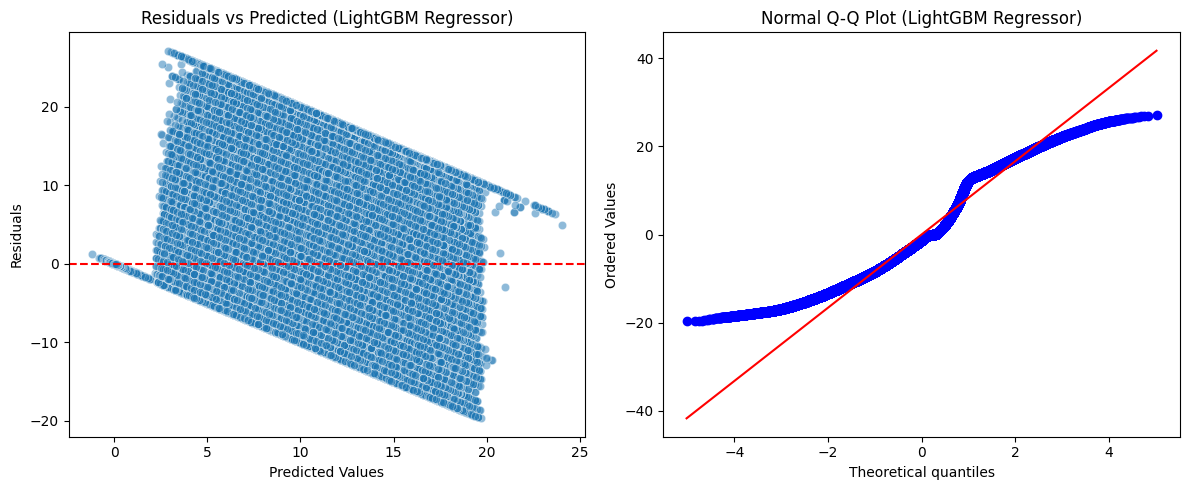

5758

In [ ]:
# --- MODEL: LightGBM Regressor ---
# Note: LightGBM is highly efficient for large datasets (10M+ rows).

# Convert X_test_scaled to DataFrame to match training feature names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train_numeric.columns)

# Defining the model
lgbm_reg = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)

# Training on the full scaled data
lgbm_reg.fit(X_train_scaled, y_train)

# Predicting on the scaled data
lgbm_pred = lgbm_reg.predict(X_test_scaled_df)

# Numerical Evaluation
evaluate_regression("LightGBM Regressor", y_test, lgbm_pred, X_test_scaled_df)

# CRITICAL RAM Optimization
del lgbm_reg, lgbm_pred, X_test_scaled_df
gc.collect()